# Read-in the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
pop_df = pd.read_csv("./data/populations.txt", sep='\t')
pop_df.head(5)

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [3]:
pop_df.shape

(21, 4)

Let us investigate the dataset by checking the number of variables/fetures and observations.

**Number of variables/features = number of columns in DF**

We have 4 variables in the dataset (with year).

**Number of observations = number of rows in DF**

We have 84 observations in the dataset (21*4).

Let us check the names of the variables embedded in the dataset. Note that sometimes we do not have column names (variable names) in the dataset.

In [4]:
pop_df.columns

Index(['year', 'hare', 'lynx', 'carrot'], dtype='object')

In [30]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
year      21 non-null int64
hare      21 non-null float64
lynx      21 non-null float64
carrot    21 non-null int64
fox       21 non-null int64
dtypes: float64(2), int64(3)
memory usage: 968.0 bytes


We only need the values to feed into the models - we can access the values this way.

In [5]:
pop_df.values

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

Data type is also an important characteristic of the data, we can access the data types this way.

In [6]:
pop_df.dtypes

year        int64
hare      float64
lynx      float64
carrot      int64
dtype: object

We can access columns (Pandas series) using their labels:

In [7]:
hare_df = pop_df["hare"]
hare_df

0     30000.0
1     47200.0
2     70200.0
3     77400.0
4     36300.0
5     20600.0
6     18100.0
7     21400.0
8     22000.0
9     25400.0
10    27100.0
11    40300.0
12    57000.0
13    76600.0
14    52300.0
15    19500.0
16    11200.0
17     7600.0
18    14600.0
19    16200.0
20    24700.0
Name: hare, dtype: float64

Or alternatively using the label as a property of the dataframe:

In [8]:
pop_df.hare

0     30000.0
1     47200.0
2     70200.0
3     77400.0
4     36300.0
5     20600.0
6     18100.0
7     21400.0
8     22000.0
9     25400.0
10    27100.0
11    40300.0
12    57000.0
13    76600.0
14    52300.0
15    19500.0
16    11200.0
17     7600.0
18    14600.0
19    16200.0
20    24700.0
Name: hare, dtype: float64

# Data Exploration

Data exploration is easier with Pandas.

The usual numeric operations are available for dataframes or series:

In [9]:
print ("Mean Hare Population: ", hare_df.mean())

Mean Hare Population:  34080.95238095238


In [10]:
print ("Mean Populations: \n", pop_df[["hare","lynx","carrot"]].mean())
print ("\n")
print ("Standard Deviations: \n", pop_df[["hare","lynx","carrot"]].std())

Mean Populations: 
 hare      34080.952381
lynx      20166.666667
carrot    42400.000000
dtype: float64


Standard Deviations: 
 hare      21413.981859
lynx      16655.999920
carrot     3404.555771
dtype: float64


The describe() method provides a detailed description of variables:

In [11]:
pop_df[["hare","lynx","carrot"]].describe()

,hare,lynx,carrot
count,21.000000,21.000000,21.000000
mean,34080.952381,20166.666667,42400.000000
std,21413.981859,16655.999920,3404.555771
min,7600.000000,4000.000000,36700.000000
25%,19500.000000,8600.000000,39800.000000
50%,25400.000000,12300.000000,41800.000000
75%,47200.000000,29700.000000,44500.000000
max,77400.000000,59400.000000,48300.000000


In [12]:
pop_df.describe()

,year,hare,lynx,carrot
count,21.000000,21.000000,21.000000,21.000000
mean,1910.000000,34080.952381,20166.666667,42400.000000
std,6.204837,21413.981859,16655.999920,3404.555771
min,1900.000000,7600.000000,4000.000000,36700.000000
25%,1905.000000,19500.000000,8600.000000,39800.000000
50%,1910.000000,25400.000000,12300.000000,41800.000000
75%,1915.000000,47200.000000,29700.000000,44500.000000
max,1920.000000,77400.000000,59400.000000,48300.000000


A better way to do correlation analysis:

In [13]:
pop_df[["hare","lynx","carrot"]].corr()

,hare,lynx,carrot
hare,1.000000,0.071892,-0.016604
lynx,0.071892,1.000000,-0.680577
carrot,-0.016604,-0.680577,1.000000


Also sorting is done easily:

In [14]:
pop_df.sort_values(by=['hare'])

,year,hare,lynx,carrot
17,1917,7600.0,15800.0,41800
16,1916,11200.0,29700.0,36700
18,1918,14600.0,9700.0,43300
19,1919,16200.0,10100.0,41300
6,1906,18100.0,19000.0,38600
15,1915,19500.0,51100.0,39000
5,1905,20600.0,41700.0,39800
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
20,1920,24700.0,8600.0,47300


More examples of accessing and manipulating data in dataframes:

In [15]:
# finding all instances when the population of hares is above 50k
hare_above_50K = pop_df.hare>50000
print (hare_above_50K)
print ("\n")
print (pop_df[hare_above_50K])
print ("\n")
print (pop_df[hare_above_50K].year)

0     False
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13     True
14     True
15    False
16    False
17    False
18    False
19    False
20    False
Name: hare, dtype: bool


    year     hare     lynx  carrot
2   1902  70200.0   9800.0   41500
3   1903  77400.0  35200.0   38200
12  1912  57000.0  12300.0   43800
13  1913  76600.0  19500.0   40900
14  1914  52300.0  45700.0   39400


2     1902
3     1903
12    1912
13    1913
14    1914
Name: year, dtype: int64


In [16]:
# finding all instances when the population of one of the animal species is above 50k
above_50K = (pop_df["hare"]>50000) | (pop_df["lynx"]>50000)
print (pop_df[above_50K])
#print pop_df[hare_above_50K].year

    year     hare     lynx  carrot
2   1902  70200.0   9800.0   41500
3   1903  77400.0  35200.0   38200
4   1904  36300.0  59400.0   40600
12  1912  57000.0  12300.0   43800
13  1913  76600.0  19500.0   40900
14  1914  52300.0  45700.0   39400
15  1915  19500.0  51100.0   39000


We know that the *year* column is only an identifier, so we may not need it in the analysis.

In [17]:
pop2 = pop_df.drop("year", axis=1)
pop2

,hare,lynx,carrot
0,30000.0,4000.0,48300
1,47200.0,6100.0,48200
2,70200.0,9800.0,41500
3,77400.0,35200.0,38200
4,36300.0,59400.0,40600
5,20600.0,41700.0,39800
6,18100.0,19000.0,38600
7,21400.0,13000.0,42300
8,22000.0,8300.0,44500
9,25400.0,9100.0,42100


When necessary, we can convert a dataframe (or a series) into a Numpy array:

In [18]:
poptable = np.array(pop2)
poptable

array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.],
       [20600., 41700., 39800.],
       [18100., 19000., 38600.],
       [21400., 13000., 42300.],
       [22000.,  8300., 44500.],
       [25400.,  9100., 42100.],
       [27100.,  7400., 46000.],
       [40300.,  8000., 46800.],
       [57000., 12300., 43800.],
       [76600., 19500., 40900.],
       [52300., 45700., 39400.],
       [19500., 51100., 39000.],
       [11200., 29700., 36700.],
       [ 7600., 15800., 41800.],
       [14600.,  9700., 43300.],
       [16200., 10100., 41300.],
       [24700.,  8600., 47300.]])

# Data Visualization

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

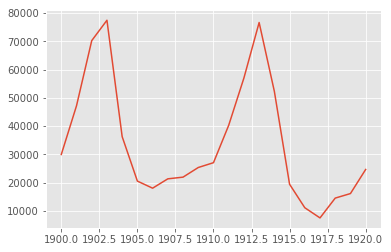

In [20]:
plt.plot(pop_df["year"], pop_df["hare"])

We can also visualize multiple variables/features in one figure. 

But you need to make sure:
- All data visualized in the same figure should be of the same data type (e.g. you cannot mix continuous and categorical data types in the same figure);
- You do not want your visualization to be too busy - below is a good example - but it is **highly discouraged** to include more than **5** variables/features in the same figure.

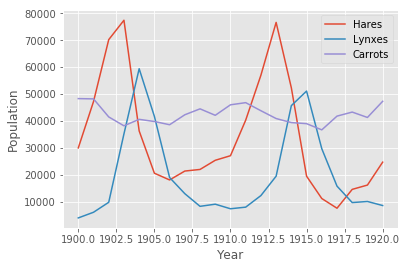

In [21]:
plt.plot(pop_df["year"], pop2, label=['Hares','Lynxes','Carrots'])
plt.legend( ('Hares','Lynxes','Carrots') )
plt.ylabel('Population')
plt.xlabel('Year')
plt.show()

Line charts look good at visualizing **continuous** variables (particularly when they are time series like what we have here); but they are not useful when dealing with **categorical** variables. 

Below is a way of dealing with **categorical** variables.

[36000, 49000, 0, 6]

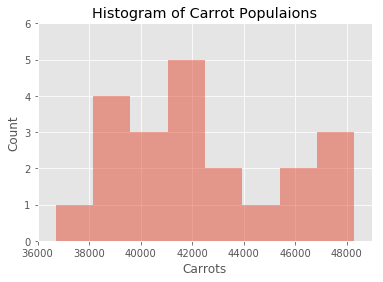

In [22]:
plt.hist(pop_df["carrot"], bins=8, alpha=0.5)
plt.xlabel('Carrots')
plt.ylabel('Count')
plt.title('Histogram of Carrot Populaions')
plt.axis([36000, 49000, 0, 6])
#plt.grid(True)

Pandas has its own versatile "plot" method that can handle most types of charts:

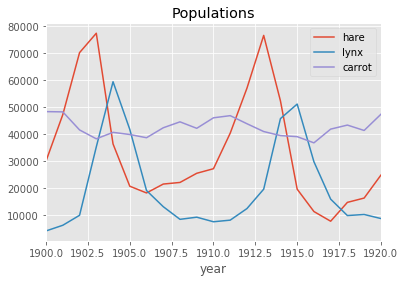

In [23]:
pop_df.plot(x="year", title="Populations")

When we want to investigate the cross-variable relationship, we can use **scatterplot** as following.

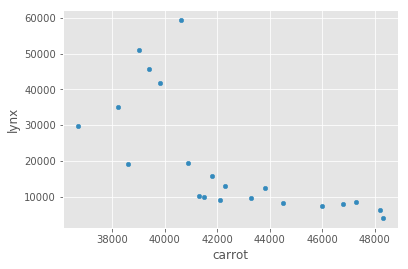

In [24]:
pop_df.plot(x="carrot", y="lynx", kind="scatter")

## Data Exploration - Interpretation

This is where data analysts bring the most value. 

Q: Can you explain the relationship between 'lynx' and 'carrot'? Do they have any linear relationship?

A: There is no relationship from 35,000 - 42,000, however, after it does start to resamble linear relationship. 

It is also important to make best guess assumptions as to why data is this way. For instance, how could you explain a better relationship between lynx and carrot as frequency increases? 

Boxplot is another visualization tool when investigating the distribution of continuous variables. In a boxplot:
- the box is the **confidence interval** of the values of a certain variable;
- the attenas (above and below the box) are the **actual range (min. to max.)**;
- the line in the box is the **mean (average) value** of the variable.

You can use the boxplot to investigate the distribution of the variable - this is the same as checking the 'bell curve' in the distribution chart. For instance, in the chart below, both 'hare' and 'lynx' are right-skewed, while 'carrot' is in a normal (but narrow) distribution.

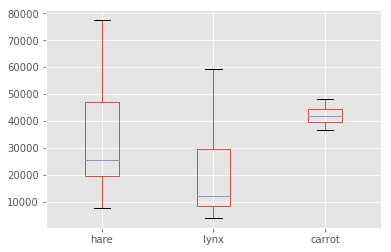

In [25]:
pop_df.boxplot(column=["hare","lynx","carrot"], return_type='axes')

In [26]:
fox_col = np.random.randint(low=5000, high=20000, size=21)
fox_col

array([ 9805, 16392,  6296, 15170, 19402, 13419,  9334, 15331,  9681,
        5641,  7030, 18131,  9075, 13735,  7677, 16244, 10719, 17552,
       15236, 18167, 18629])

In [27]:
pop_df["fox"] = pd.Series(fox_col, index=pop_df.index)
pop_df

,year,hare,lynx,carrot,fox
0,1900,30000.0,4000.0,48300,9805
1,1901,47200.0,6100.0,48200,16392
2,1902,70200.0,9800.0,41500,6296
3,1903,77400.0,35200.0,38200,15170
4,1904,36300.0,59400.0,40600,19402
5,1905,20600.0,41700.0,39800,13419
6,1906,18100.0,19000.0,38600,9334
7,1907,21400.0,13000.0,42300,15331
8,1908,22000.0,8300.0,44500,9681
9,1909,25400.0,9100.0,42100,5641


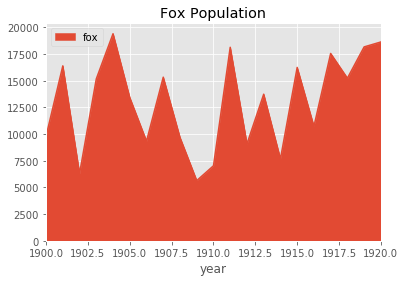

In [28]:
pop_df.plot(x="year", y="fox", kind="area", title="Fox Population")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2958e26d8>,
      dtype=object)

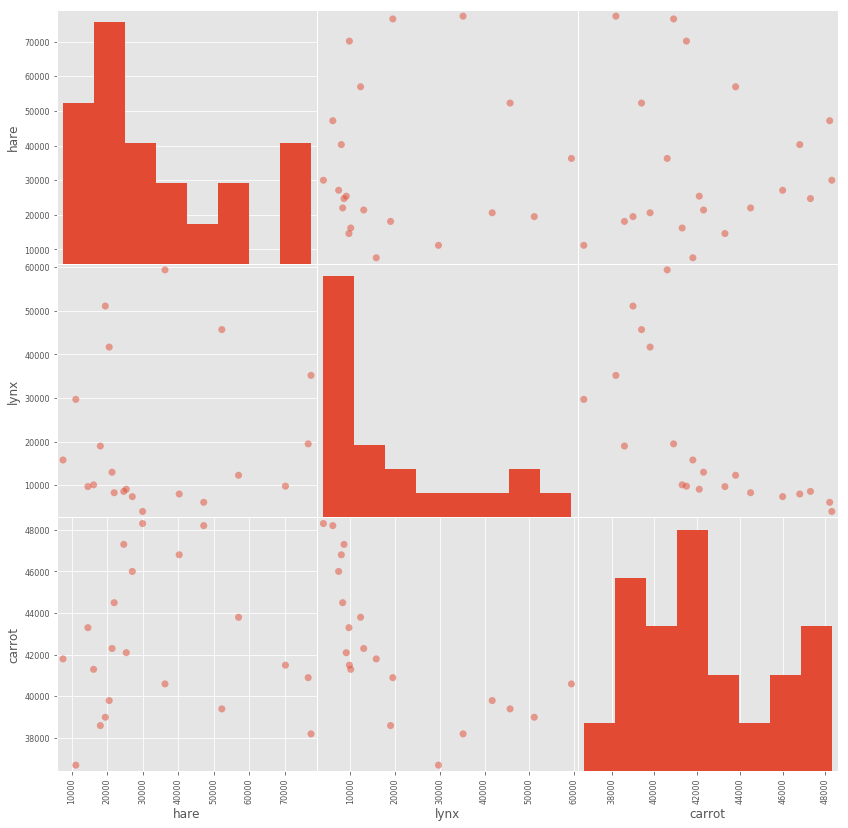

In [29]:
pd.plotting.scatter_matrix(pop_df[["hare","lynx","carrot"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)